Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Proyecto-IA-DeteccionDeFraudeEnTransacciones
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642

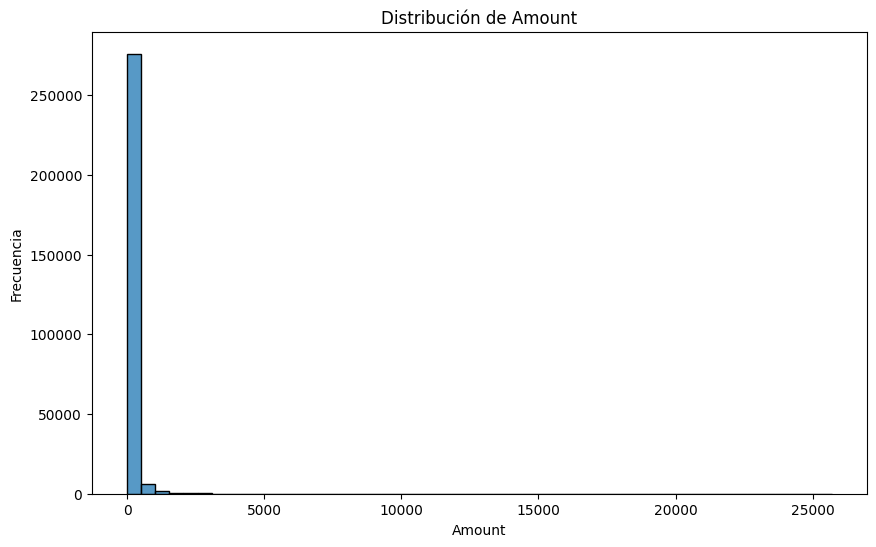

Figura guardada en src/visualization/correlation_matrix.png


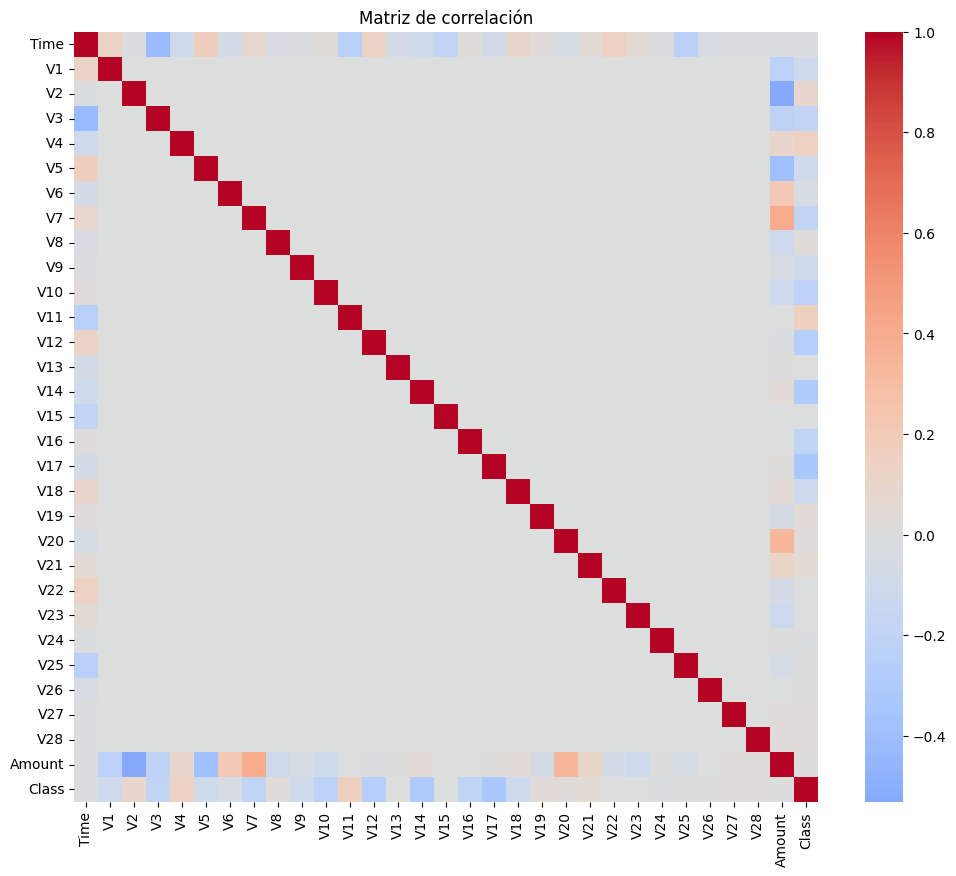

In [4]:
# --------------------
# SETUP DRIVE Y DIRECTORIO
# --------------------
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Proyecto-IA-DeteccionDeFraudeEnTransacciones

# --------------------
# IMPORTS
# --------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append('/content/drive/MyDrive/Proyecto-IA-DeteccionDeFraudeEnTransacciones/src')
from utils import load_data, save_model
from visualization import save_plot

# --------------------
# CARGAR DATA
# --------------------
data_path = "data/creditcard.csv"
df = load_data(data_path)

# --------------------
# VISTA GENERAL
# --------------------
print(df.head())
print(df.info())
print(df['Class'].value_counts())

# --------------------
# HISTOGRAMA DE MONTOS
# --------------------
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(df['Amount'], bins=50, ax=ax)
ax.set_title("Distribución de Amount")
ax.set_xlabel("Amount")
ax.set_ylabel("Frecuencia")

figures_dir = "src/visualization"
os.makedirs(figures_dir, exist_ok=True)
save_plot(fig, "hist_amount.png", figures_dir)
plt.show()

# --------------------
# MATRIZ DE CORRELACIÓN
# --------------------
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm", center=0, ax=ax)
ax.set_title("Matriz de correlación")
save_plot(fig, "correlation_matrix.png", figures_dir)
plt.show()
